# 2 - COMPUTER VISION - Camera Calibration
    The aim of this program is to perform a full camera callibration

## Using Chessboard to find distortion

### STEP 1: Example of finding corners on an image

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

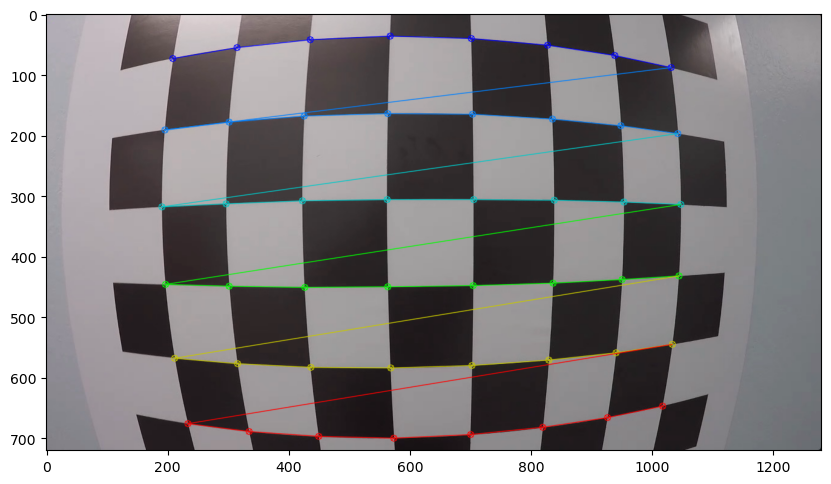

In [27]:
# prepare object points
nx = 8 # number of inside corners in x
ny = 6 # number of inside corners in y

# Make a list of calibration images
fname = 'images/Chessboard_Callibration.png'
img = cv2.imread(fname)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.figure(figsize=(10,10), dpi=100)
    plt.imshow(img)

### Step 2: Perform the distortion calibration

In [59]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

In [118]:
# Read the calibration images
images = glob.glob('images/calibration_wide/GOPR*.jpg')

# Create the arrays to store real chessboard points and "from image" chessboard points
objPoints = []
imgPoints = []

# prepare object points from the chessboard
nx = 8 # number of inside corners in x
ny = 6 # number of inside corners in y

# Prepare points for real object like (0,0,0), (1, 0, 0), (2, 0, 0)..... (7, 5, 0)
realP = np.zeros((nx * ny, 3), np.float32)
realP[:,:2] = np.mgrid[ 0:nx, 0:ny ].T.reshape(-1, 2) # to get x,y coordinates

for idx, fileName in enumerate(images):
    img = mpimg.imread(fileName)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    if ret == True:
        # corners = [corner for corner in corners]
        objPoints.append(realP)
        imgPoints.append(corners)

In [128]:
test_img = mpimg.imread('images/calibration_wide/test_image.jpg')
gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objPoints, imgPoints, gray.shape[::-1], None, None)
dst = cv2.undistort(test_img, mtx, dist, None, mtx)
cv2.imwrite('images/calibration_wide/test_undist.jpg',dst)

True

Text(0.5, 1.0, 'Undistorted Image')

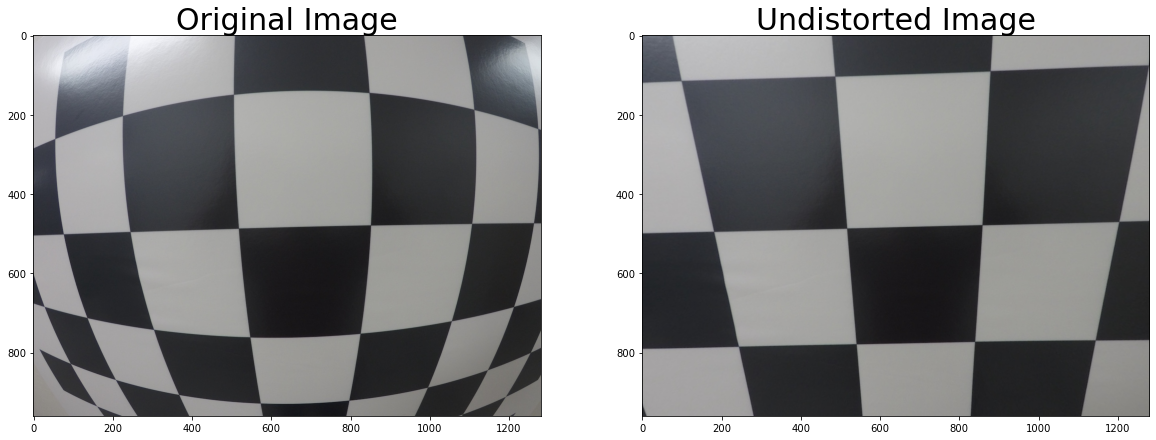

In [129]:
import pickle

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "images/calibration_wide/wide_dist_pickle.p", "wb" ) )

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(test_img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)